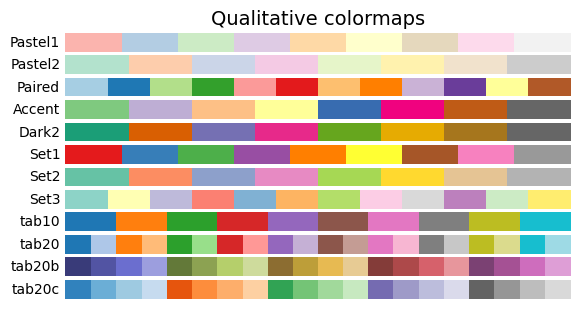

In [96]:
# plot results
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# here..
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

x_y_label_font = 20
x_y_legend_font = 20

plt.rc('font', family='Times New Roman')
fig_dpi = 220
fig_shape_squre = (6, 5)

def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh), dpi=100)
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list
    plt.show()


class MyColor(object):
    def __init__(self, cmap_name, skip_idx=5, backup_name='Set1', 
                 backup_color=3, add_red=False, pre_defined=False):
        if pre_defined:
            # colors = ['#3682be','#45a776','#f05326','#eed777','#334f65','#b3974e','#38cb7d','#ddae33','#844bb3','#93c555','#5f6694','#df3881']
            colors = '00a8e1 - 99cc00 - e30039 - 800080 - 00994e - ff6600 - 808000 - db00c2 - 008080 - 0000ff - c8cc00'
            colors = ["#"+c.strip() for c in colors.split('-')]
            print(colors)
            cmap = ListedColormap(colors, name = 'mycmap')
            self.color_set = list(cmap.colors)
        else:
            if isinstance(cmap_name, list):
                #NOTE: combine all cmaps:
                self.color_set = []
                for cname in cmap_name:
                    self.color_set.extend(list(plt.get_cmap(cname).colors))
                print('color_set: ', self.color_set[15])
            else:
                self.color_set = list(plt.get_cmap(cmap_name).colors)
                
        # NOTE: always ignore light yellow in Set1

        if add_red:
            self.light_set = list(plt.get_cmap('Set1').colors)
            self.color_set  = [v for i, v in enumerate(list(plt.get_cmap(cmap_name).colors)[:-1]) if i!=5]
            self.color_set.extend([self.light_set[0]])
            self.color_set.extend([self.light_set[4]])

        self.backup_set = plt.get_cmap(backup_name).colors
        self.backup_color = backup_color
        self.skip_idx=skip_idx
        self.idx = 0
        self.color_len = len(self.color_set)
        
    def get_color(self):
        if self.idx == self.color_len - 1:
            self.idx = 0
        if self.idx == self.skip_idx:
            self.idx += 1
            return self.backup_set[self.backup_color]
        color = self.color_set[self.idx]
        self.idx += 1
        return color
    
    def shuffle(self):
        np.random.shuffle(self.color_set)
    

plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])


# load all results from logs:

In [99]:
import os
import json
import generate_regression_datasets as grd

import importlib
importlib.reload(grd)

    # {"avg_TR_score": 10.000000000279954, "std_TR_score": 2.290051166528402e-10, "avg_TS_score": 10.00000001051161, "std_TS_score": 1.5722685459922009e-09, "avg_TR_ROCAUC": -1.0, 
    # "std_TR_ROCAUC": 0.0, "avg_TE_ROCAUC": -1.0, "std_TE_ROCAUC": 0.0}

dict_keys(['REDDIT-BINARY', 'REDDIT-MULTI-5K', 'COLLAB', 'IMDB-BINARY', 'IMDB-MULTI', 'NCI1', 'AIDS', 'ENZYMES', 'PROTEINS', 'DD', 'MUTAG', 'CSL', 'CIFAR10', 'MNIST', 'PPI', 'hiv', 'bace', 'bbpb', 'ogbg_molhiv', 'ogbg_ppa', 'PTC', 'QM9', 'ogbg_moltox21', 'ogbg-molbbbp', 'ogbg-molbace', 'syn_cc'])


<module 'generate_regression_datasets' from '/li_zhengdao/github/GenerativeGNN/generate_regression_datasets.py'>

In [100]:
log_results = {}

for k, log_path in grd.data_log_path_dict.items():
      MLP_log_path_attr, GNN_log_path_attr, MLP_log_path_degree ,GNN_log_path_degree, GCN_log_path_attr, GCN_log_path_degree = log_path
      grd.load_log_to_log_results(log_results, MLP_log_path_attr, GNN_log_path_attr, MLP_log_path_degree ,GNN_log_path_degree)

data name: MUTAG
data name: DD
data name: PROTEINS
data name: ENZYMES
data name: AIDS
data name: NCI1
data name: molhiv
data name: moltox21
data name: ogbg-molbace
data name: ppa
data name: CIFAR10
data name: MNIST
data name: IMDB-BINARY
data name: IMDB-MULTI
data name: COLLAB
data name: REDDIT-BINARY


In [101]:
log_results['COLLAB']

[[(nan, nan), (nan, nan)],
 [(nan, nan), (nan, nan)],
 [(67.68000027770996, 0.9431861332616212), (-100.0, 0.0)],
 [(69.92000032552083, 1.0921131536649469), (-100.0, -100.0)]]

In [102]:
print(len(set(log_results.keys())))
print(set(log_results.keys()))
print(log_results['AIDS'])
# mutag, DD, enzymes, proteins.

16
{'REDDIT-BINARY', 'MNIST', 'molhiv', 'MUTAG', 'CIFAR10', 'DD', 'IMDB-MULTI', 'ENZYMES', 'moltox21', 'NCI1', 'ogbg-molbace', 'IMDB-BINARY', 'PROTEINS', 'ppa', 'COLLAB', 'AIDS'}
[[(99.06666694132488, 0.8537497041081125), (97.88541666666667, 2.086481995622186)], [(95.68333367919921, 1.5283435677256068), (92.83333333333333, 2.228192933746984)], [(89.20000037638346, 1.156623305681563), (72.99999999999999, 2.89155859548291)], [(95.33333348592123, 1.1595018365101961), (92.30208333333334, 1.9445715484251176)]]


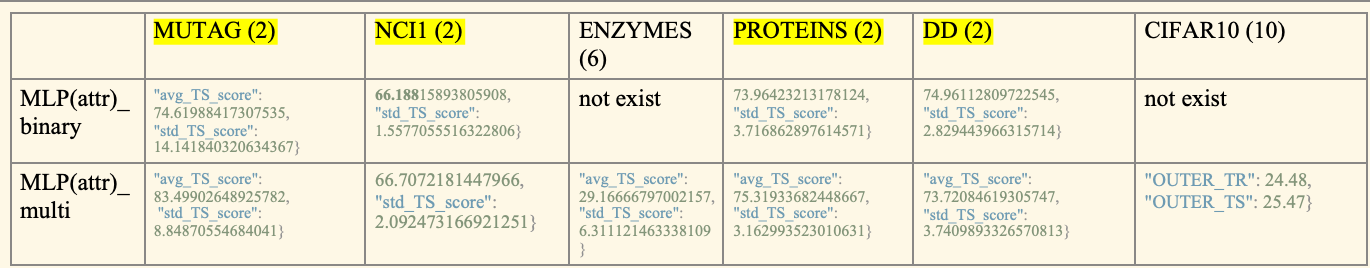

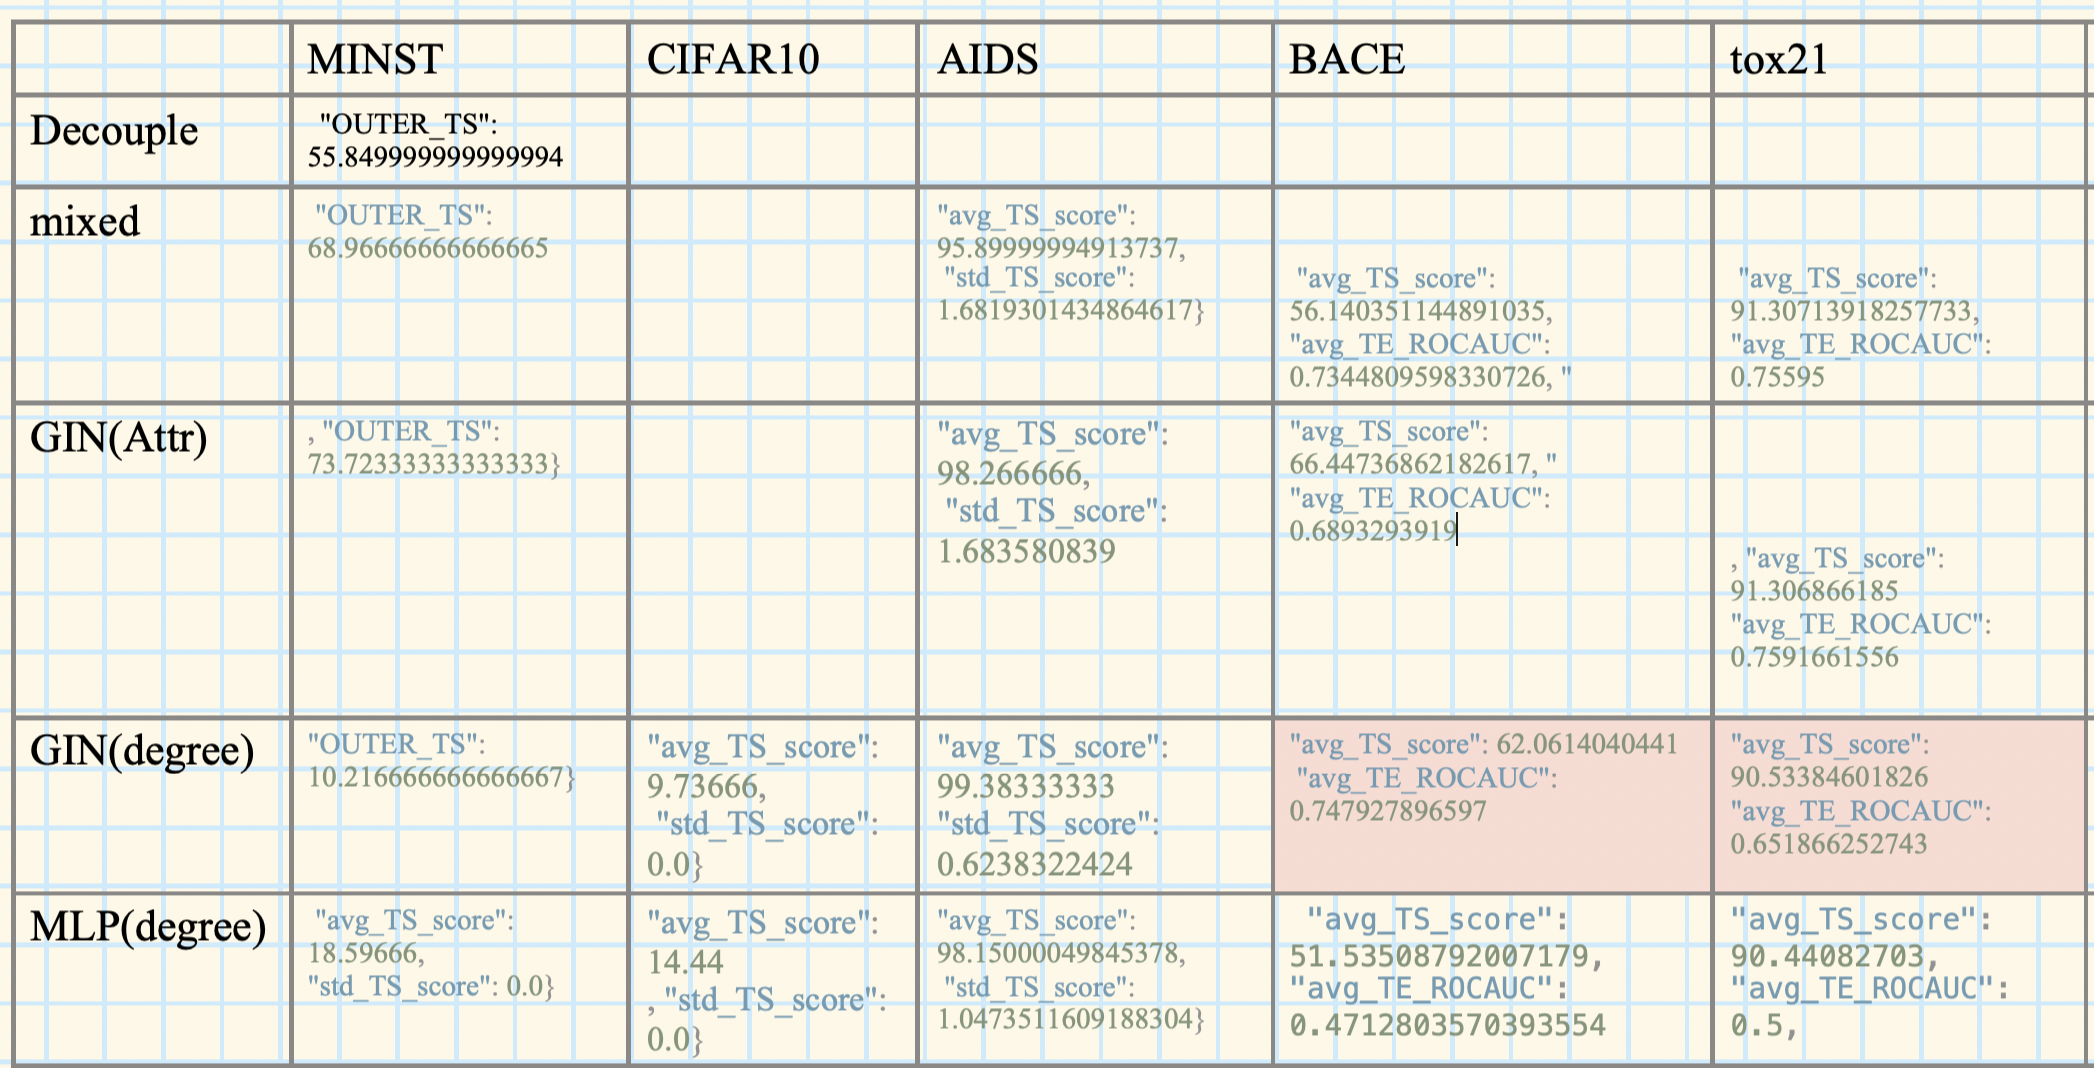
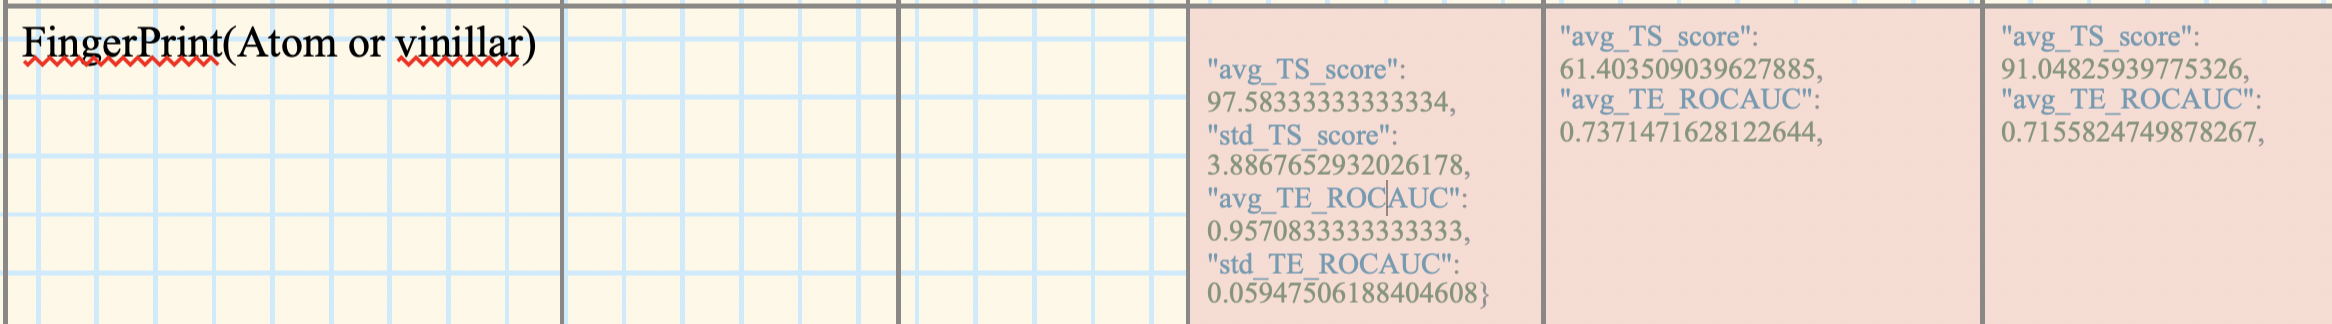

In [103]:
ids = ['GraphKernel', 'MLP(Degree)', 'GNN(Degree)','GNN(Degree-shuffled)', 'GNN(PageRank)', 'GNN(Gaussian)',
       'MLP(Attr)', 'GNN(Attribute)', 'GNN(Mix)', 'GNN(Decoupled)']

ids = {k:i for i, k in enumerate(ids)}
print('ids:', ids)

# data name: MNIST
# data name: CIFAR10
# data name: NCI1
# data name: IMDB-BINARY
# data name: IMDB-MULTI
# data name: molhiv
# data name: moltox21
# data name: ogbg-molbace
# data name: ppa
# data name: DD
# data name: PROTEINS
# data name: ENZYMES
# data name: MUTAG

results = \
{'MUTAG': [(86.23, 8.50 ),( 84.78,7.71 ),( 87.28,6.54 ),( 68.30,10.89),( 60.65,9.54 ),( 59.82,7.63)], 
"PROTEINS":[( 72.50,2.58 ),( 72.48,2.62 ),( 71.09,3.11 ),( 66.92,3.41 ),( 68.00,5.50 ),(66.92,3.41)],
"DD": [(76.06,3.21 ),( 67.59,4.65 ),( 69.58,3.11 ),( 62.10,3.40 ),    (62.10,3.40),           (62.10,3.40)],
"NCI1":[( 62.50,1.79 ),( 59.10,3.39 ),( 70.02,2.02 ),( 63.77,1.79 ),    ( 51.75,3.38 ), ( 51.75,3.38 )],
"ENZYMES": [( 25.00,3.33 ),( 23.67,4.25 ),( 27.33,4.24 ),( 20.16,5.00 ),( 16.77,4.35 ), (0.0,0.0)],
"CIFAR10": [(14.62, 0.0),(14.44, 0.0),(10.25, 0.0),(10.25, 0.0),(10.25, 0.0),(10.25, 0.0)],
"molhiv": [(51, 0.0), (74.95, 0.0),(66.00, 0.0),(66.00, 0.0),(10.25, 0.0),(10.25, 0.0)],
"MNIST": [(0.000000, 0.0),(18.60, 0.0),(10.22, 0.0),(10.25, 0.0),(10.25, 0.0),(10.25, 0.0)],
"ogbg-molbace": [(0.000000, 0.0),(47.13, 0.0),(74.79, 0.0),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
"moltox21": [(0.000000, 0.0),(50.50, 0.0),(65.19, 0.0),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
"ppa": [(0.000000, 0.0),(50.50, 0.0),(65.19, 0.0),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
"IMDB-MULTI": [(0.000000, 0.0),(50.50, 0.0),(65.19, 0.0),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
"IMDB-BINARY": [(0.000000, 0.0),(50.50, 0.0),(65.19, 0.0),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
'COLLAB':  [(63.92, 1.63), (59.10, 3.39), (69.92, 1.09),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
'REDDIT-BINARY': [(73.5, 2.0494), (77.62, 2.98), (87.26, 1.52),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)],
"AIDS": [(0.000000, 0.0),(98.15, 1.05),(99.38, 0.62),(0.0, 0.0),(0.0, 0.0),(0.0, 0.0)]
}

results_attr = {'MUTAG':[(83.50, 8.85), (86.24,7.54), (85.83,6.65),(87.84,6.48)],
'PROTEINS':[(75.32, 3.16), (72.47,2.96), (72.28,3.08),(73.13,3.27)],
'DD':[(74.96, 2.83), (71.08,3.01), (69.33,2.95),(72.48,3.79)],
'NCI1':[(66.71, 2.09), (75.37,3.39), (79.34,2.26),(79.80,2.27)],
'ENZYMES':[(29.17, 6.31), (34.61,4.35), (37.38,5.01),(32.61,3.00)],
"CIFAR10":[(25.47, 0.0), (44.13, 0.0), (43.76,0.0),(43.98,0.0)],
"molhiv":[(73.95, 0.0),(75.38, 0), (72.70,0.0), (75.95,0.0)],
"MNIST":[(18.60, 0.0),(73.72, 0), (68.97,0.0), (55.85,0.0)],
"ogbg-molbace":[(73.71, 0.0),(68.93, 0), (73.45,0.0), (0.0,0.0)],
"moltox21":[(71.56, 0.0),(75.91, 0), (75.60,0.0), (0.0,0.0)],
"IMDB-MULTI":[(71.56, 0.0),(75.91, 0), (75.60,0.0), (0.0,0.0)],
"IMDB-BINARY":[(71.56, 0.0),(75.91, 0), (75.60,0.0), (0.0,0.0)],
"ppa":[(71.56, 0.0),(75.91, 0), (75.60,0.0), (0.0,0.0)],
'REDDIT-BINARY': [(0.000000, 0.0),(0.50, 0.0),(65.19, 0.0),(0.0, 0.0)],
'COLLAB':  [(0.000000, 0.0),(.0, 0.0),(65.19, 0.0),(0.0, 0.0)],
"AIDS":[(97.58, 0.0),(98.27, 1.68), (95.90, 1.68), (0.0,0.0)]
}

# combine:
for k in results.keys():
    results[k].extend(results_attr[k])

# sort:
names = ['GNN(Degree)', 'GraphKernel', 'MLP(Degree)', 'GNN(Attribute)', 'GNN(Mix)', 'GNN(Decoupled)']

names = ['MLP(Attr)', 'GNN(Attribute)', 'MLP(Degree)', 'GraphKernel', 'GNN(Degree)']

for k in results.keys():
    new_v = [results[k][ids[name]] for name in names]
    results[k] = new_v

show_data_struct = ['MUTAG','PROTEINS', 'DD',  'NCI1', 'ENZYMES', 'molhiv', 
             'ogbg-molbace', 'moltox21', 'AIDS','IMDB-MULTI', 'IMDB-BINARY',
             'REDDIT-BINARY', 'COLLAB', 'ppa', 'MNIST', 'CIFAR10']

show_data_attr = ['MUTAG','PROTEINS', 'DD',  'NCI1', 'ENZYMES', 'molhiv', 
             'ogbg-molbace', 'moltox21', 'AIDS', 'ppa', 'MNIST', 'CIFAR10']


def get_data_block(results, names):
    data_block = []
    for name in names:
        data_block.append(results[name])
    return np.array(data_block)


attr_data_block = get_data_block(results, show_data_attr)
struct_data_block = get_data_block(results, show_data_struct)

# copy and concat attr_data_block:
attr_data_block = np.concatenate([attr_data_block, attr_data_block], axis=2)
struct_data_block = np.concatenate([struct_data_block, struct_data_block], axis=2)

ids: {'GraphKernel': 0, 'MLP(Degree)': 1, 'GNN(Degree)': 2, 'GNN(Degree-shuffled)': 3, 'GNN(PageRank)': 4, 'GNN(Gaussian)': 5, 'MLP(Attr)': 6, 'GNN(Attribute)': 7, 'GNN(Mix)': 8, 'GNN(Decoupled)': 9}


In [104]:
"""new_res:

MLP_log_path_degree
GNN_log_path_degree
MLP_log_path_attr
GNN_log_path_attr

replace:
names = ['MLP(Attr)', 'GNN(Attribute)', 'MLP(Degree)', 'GraphKernel', 'GNN(Degree)']

"""
def replace_data(data_block, names):
    for i, name in enumerate(names):
        new_v = np.array(log_results[name])
        new_v = new_v.reshape((new_v.shape[0], 2 * new_v.shape[1]))
        # some datasets use roc_auc:
        """
        data name: MUTAG
        data name: DD
        data name: PROTEINS
        data name: ENZYMES
        data name: CIFAR10
        data name: MNIST
        data name: AIDS
        data name: NCI1
        data name: IMDB-BINARY
        data name: IMDB-MULTI
        data name: COLLAB
        data name: REDDIT-BINARY
        data name: molhiv
        data name: moltox21
        data name: ogbg-molbace
        data name: ppa
        """
        data_block[i, 0] = new_v[0].squeeze() # MLP attr
        data_block[i, 1] = new_v[1].squeeze()  # GNN attr
        data_block[i, 2] = new_v[2].squeeze()  # MLP degree
        data_block[i, 4] = new_v[3].squeeze()  # GNN degree

replace_data(attr_data_block, show_data_attr)
replace_data(struct_data_block, show_data_struct)


# generate latex table using all data_blocks

In [105]:
# generate latex table using all data_blocks

print(struct_data_block.shape)

from tabulate import tabulate

B = struct_data_block
# Assume B is your numpy array with shape (14, 7, 2)
# B = np.random.rand(14, 7, 2)  # Uncomment this line to generate random data
# Assume B is your numpy array with shape (14, 7, 2)
# B = np.random.rand(14, 7, 2)  # Uncomment this line to generate random data

# Assume L is your dataset name list with size 14
L = show_data_struct

latex_names = ['\mathcal{M}^{\\text{Baseline}}_\\textbf{A}', '\mathcal{M}^{\\text{GNN}}_\\textbf{A}',
               '\mathcal{M}^{\\text{Baseline}}_\\textbf{A}',
               '\mathcal{M}^{\\text{GraphKernel}}_\\textbf{A}',
               '\mathcal{M}^{\\text{GIN}}_\\textbf{S}','\mathcal{M}^{\\text{GIN}}_\\textbf{S+A}' ]

# Assume M is your metric name list with size 7
# M = ['Metric'+str(i) for i in range(1, 8)]  # Uncomment for example metric names

M = [latex_names[i] for i in range(len(names))]

# Prepare the headers
headers = ["Dataset"] + M

# Prepare the rows
rows = []
for dataset_name, dataset_values in zip(L, B):
    row = [dataset_name]
    for value in dataset_values:
        mean, std_dev, roc_mean, roc_std = value
        mean_rounded = round(mean, 2)
        std_dev = round(std_dev, 2)
        row.append(f"{mean_rounded} pm {std_dev}")
    rows.append(row)

# Generate the LaTeX table
# latex_table = tabulate(rows, headers=headers, tablefmt="latex")
latex_table = tabulate(rows, tablefmt="latex")

# Uncomment the line below to print the LaTeX table
print('\\begin{table*}[t]')
print('\small')
latex_names = ["$"+ n + "$ &"  for n in latex_names]
print("Dataset & "+"  ".join(latex_names))
print(str(latex_table).replace('pm', '$\pm$'))
print('\end{table*}')

(16, 5, 4)
\begin{table*}[t]
\small
Dataset & $\mathcal{M}^{\text{Baseline}}_\textbf{A}$ &  $\mathcal{M}^{\text{GNN}}_\textbf{A}$ &  $\mathcal{M}^{\text{Baseline}}_\textbf{A}$ &  $\mathcal{M}^{\text{GraphKernel}}_\textbf{A}$ &  $\mathcal{M}^{\text{GIN}}_\textbf{S}$ &  $\mathcal{M}^{\text{GIN}}_\textbf{S+A}$ &
\begin{tabular}{llllll}
\hline
 MUTAG         & 83.7 $\pm$ 8.35  & 84.07 $\pm$ 6.26 & 79.18 $\pm$ 9.83 & 86.23 $\pm$ 8.5  & 86.71 $\pm$ 4.67 \\
 PROTEINS      & 74.24 $\pm$ 3.09 & 70.97 $\pm$ 3.79 & 60.95 $\pm$ 0.79 & 72.5 $\pm$ 2.58  & 68.24 $\pm$ 4.39 \\
 DD            & 76.12 $\pm$ 2.78 & 72.22 $\pm$ 3.18 & 62.29 $\pm$ 2.55 & 76.06 $\pm$ 3.21 & 62.73 $\pm$ 2.23 \\
 NCI1          & 66.76 $\pm$ 1.98 & 80.54 $\pm$ 1.16 & 50.58 $\pm$ 1.02 & 62.5 $\pm$ 1.79  & 75.55 $\pm$ 1.31 \\
 ENZYMES       & 29.67 $\pm$ 5.74 & 41.78 $\pm$ 3.92 & 17.56 $\pm$ 1.93 & 25.0 $\pm$ 3.33  & 28.33 $\pm$ 4.24 \\
 molhiv        & 96.58 $\pm$ 0.1  & 96.86 $\pm$ 0.13 & 96.49 $\pm$ 0.01 & 51.0 $\pm$ 0.0   & 

In [106]:
def label_replace(cur_label:str):
    if cur_label == 'ogbg-molbace':
        return 'BACE'
    elif cur_label == 'moltox21':
        return 'Tox21'
    elif cur_label == 'molhiv':
        return 'HIV'
    elif cur_label == 'IMDB-MULTI':
        return 'IMDB-M'
    elif cur_label == 'IMDB-BINARY':
        return 'IMDB-B'
    elif cur_label == 'ppa':
        return 'PPA'
    elif cur_label == 'REDDIT-BINARY':
        return 'REDDIT-B'
    else:
        return cur_label
    
def plot_gap(es1, es2, title, cus_fsize, acc=True):
    idx = 0 if acc else 2
    
    es = zip(es1, es2)
    e_res = sorted(es, key=lambda x: x[0][0].squeeze()[idx])
    
    labels = [label_replace(e[0][1]) for e in e_res]
    
    es1 = [e[0][0][idx] for e in e_res]
    es2 = [e[1][0][idx] for e in e_res]
        

    fsize = cus_fsize
    
    fig, ax = plt.subplots(figsize=fsize, dpi=100)
    
    ax.plot(es1, '-', color='lightblue', markersize=5)
    ax.plot(es2,'-', color='pink', markersize=5)
        
            
    # hide the top and right boundary:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set xticks label fontsize:
    ax.set_xticks(range(len(labels)))
    
    # ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=18)
    ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=17)
    ax.set_axisbelow(True)
    ax.grid(linestyle='dashed',zorder=0)
    # ax.set_ylabel('Structural Performance Gap', fontsize=15)
    # ax.set_title(title)
    ax.yaxis.set_tick_params(labelsize=18)
    
    
    
def plot_gap_bar(es, title, cus_fsize=None, acc=True):
    idx = 0 if acc else 2
    e_res = sorted(es, key=lambda x: x[0].squeeze()[idx])
    
    labels = [label_replace(e[1]) for e in e_res]

    # set figure size:
    if title == 'Structural Performance Gap':
        fsize = (12, 6)
    else:
        fsize = (10, 6)
    
    if cus_fsize is not None:
        fsize = cus_fsize
    
    fig, ax = plt.subplots(figsize=fsize, dpi=100)
    for i, e in enumerate(e_res):
        # set another color of the bar if the value is less than 10:
        bar_color = 'lightblue' if e[0].squeeze()[idx] > 10 else 'pink'
        
        bars = ax.bar(e[1], e[0].squeeze()[idx], label=e[1], alpha=0.9, color=bar_color, hatch='\\', edgecolor='black', linewidth=0.5)
        
        # if labels[i] in ['HIV', 'Tox21', 'BACE']:
        #     bar_color = 'lightblue' if e[0].squeeze()[2] > 10 else 'pink'
        #     bars = ax.bar(e[1], e[0].squeeze()[0], label=e[1], alpha=0.9, color=bar_color, hatch='\\', edgecolor='black', linewidth=0.5)
            
    # hide the top and right boundary:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set xticks label fontsize:
    ax.set_xticks(range(len(labels)))
    
    # ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=18)
    ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=17)
    ax.set_axisbelow(True)
    ax.grid(linestyle='dashed',zorder=0)
    # ax.set_ylabel('Structural Performance Gap', fontsize=15)
    # ax.set_title(title)
    ax.yaxis.set_tick_params(labelsize=18)
    

# plot performance gap:


In [107]:
# Effectiveness 
# non-attribute datasets:

def get_performance_gap(data_block):
    # calculate the difference between data_block[:, 0] and data_block[:, 1]
    attr_gap = data_block[:, 1] - data_block[:, 0]
    struct_gap = data_block[:, 4] - data_block[:, 2]
    return attr_gap.squeeze(), struct_gap.squeeze()

# NOTE: get E for each dataset:

roc_attr_data = []
roc_attr_name = []
roc_struct_data = []
roc_struct_name = []

for i in range(attr_data_block.shape[0]):
    if attr_data_block[i, 0, 2] > 0 and attr_data_block[i, 1, 2] > 0:
        roc_attr_data.append(attr_data_block[i])
        roc_attr_name.append(show_data_attr[i])

for i in range(struct_data_block.shape[0]):
    if struct_data_block[i, 2, 2] > 0 and struct_data_block[i, 4, 2] > 0:
        roc_struct_data.append(struct_data_block[i])
        roc_struct_name.append(show_data_struct[i])

attr_gaps, _ = get_performance_gap(attr_data_block)
_, struct_gaps = get_performance_gap(struct_data_block)

roc_attr_gaps, _ = get_performance_gap(np.array(roc_attr_data))
_, roc_struct_gaps = get_performance_gap(np.array(roc_struct_data))

print('roc_attr_gaps len', len(roc_attr_gaps))

colors = ["#0072B2", "#009E73", "#D55E00", "#E69F00", "#CC79A7"]

print('attr_gaps', attr_gaps.shape)

attr_es = [(attr_gaps[i], show_data_attr[i]) for i in range(len(show_data_attr))]
struct_es = [(struct_gaps[i], show_data_struct[i]) for i in range(len(show_data_struct))]

roc_attr_es = list(zip(roc_attr_gaps, roc_attr_name))
roc_struct_es = list(zip(roc_struct_gaps, roc_struct_name))

roc_attr_gaps len 8
attr_gaps (12, 4)


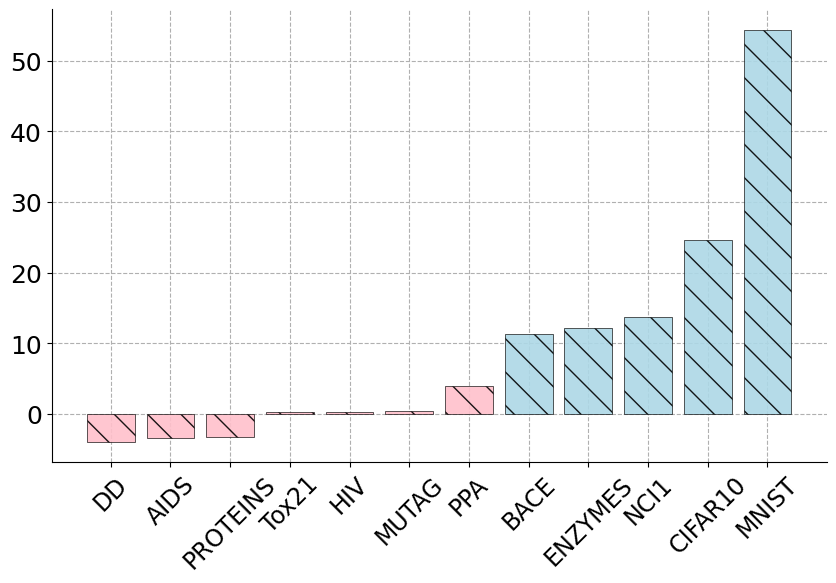

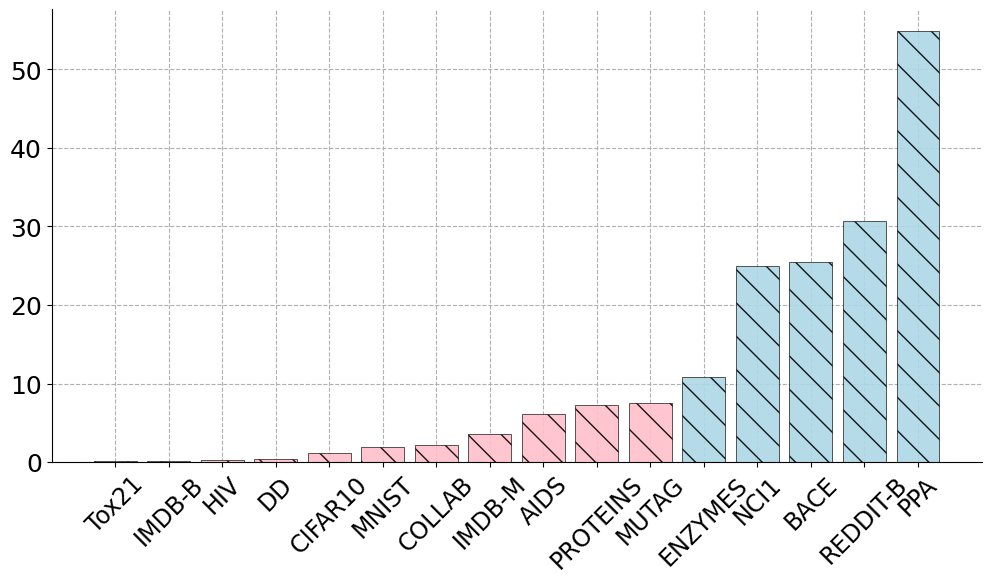

In [108]:
# filter not binary datasets:
# no proteins, AIDS, DD
plot_gap_bar(attr_es, 'Attribute Performance Gap')
plot_gap_bar(struct_es, 'Structural Performance Gap')

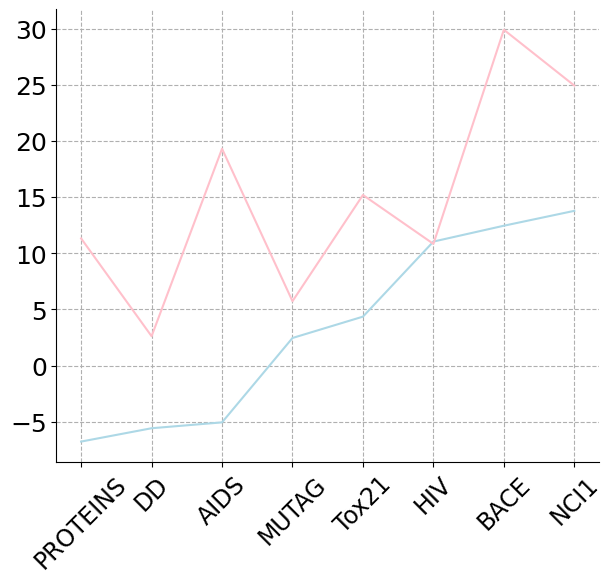

In [109]:
# filter not binary datasets:
# no proteins, AIDS, DD
plot_gap(roc_attr_es, roc_struct_es, 'Attribute/Structural Performance Gap', cus_fsize=(7, 6) , acc=False)

# use gap ratio: $\frac{gap}{acc^{Baseline}}$

# $\color{red}\text{TODO}$: Put all the scales in the paper:

- different measurements suggest the same ranking sequence of datasets, we want to find a proper scale of measurement to represent the effectiveness fairly.

attr_gaps shpae (12,)


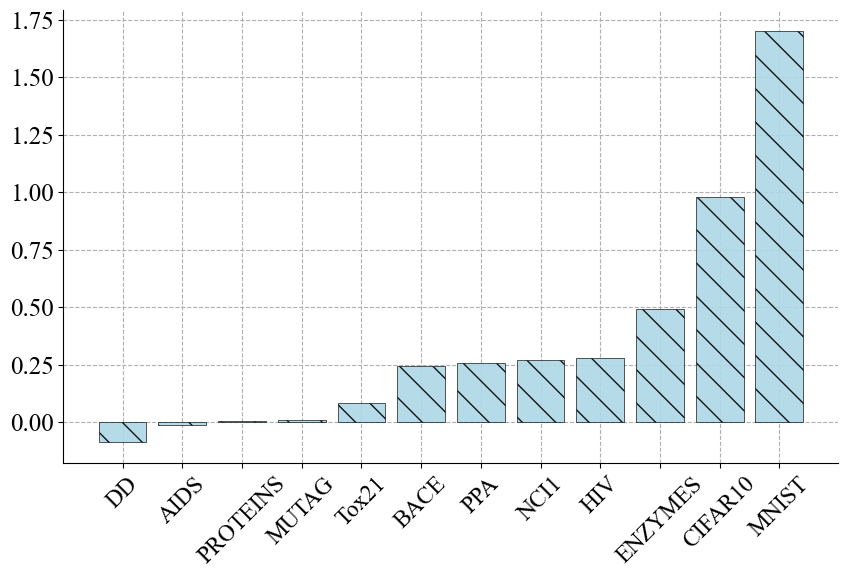

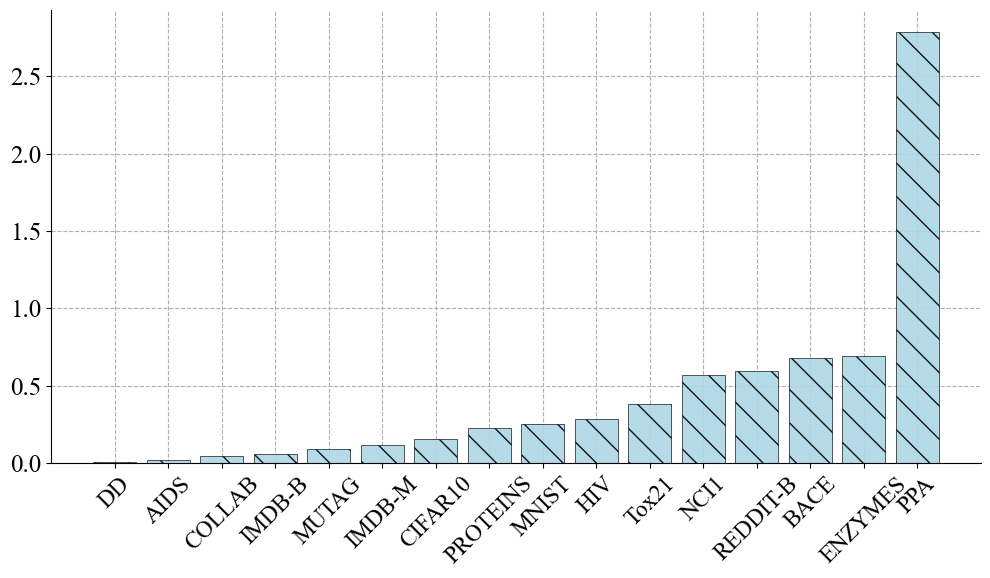

In [31]:
# Effectiveness 
# non-attribute datasets:


def get_performance_gap_ratio(data_block):
    # calculate the difference between data_block[:, 0] and data_block[:, 1]
    attr_gap = np.log2(data_block[:, 1, 0]) - np.log2(data_block[:, 0, 0])
    struct_gap = np.log2(data_block[:, 4, 0]) - np.log2(data_block[:, 2, 0])
    return attr_gap.squeeze(), struct_gap.squeeze()

# NOTE: get E for each dataset:

attr_gaps, _ = get_performance_gap_ratio(attr_data_block)
_, struct_gaps = get_performance_gap_ratio(struct_data_block)

print('attr_gaps shpae', attr_gaps.shape)

colors = ["#0072B2", "#009E73", "#D55E00", "#E69F00", "#CC79A7"]

attr_es = [(attr_gaps[i], show_data_attr[i]) for i in range(len(show_data_attr))]
struct_es = [(struct_gaps[i], show_data_struct[i]) for i in range(len(show_data_struct))]

plot(attr_es, 'Attribute Performance Gap')
plot(struct_es, 'Structural Performance Gap')
# # ax.legend()

In [11]:
groups = []

names = ['MLP(Attr)', 'MLP(Degree)', 'GraphKernel', 'GNN(Degree)', 'GNN(Attribute)', 'GNN(Mix)', 'GNN(Decoupled)']

# data_block: (7, 6, 2)

def get_group(x_names, y_names):
    if len(x_names) > 1:
        x_res = np.concatenate([np.expand_dims(data_block[:, names.index(n), 0], -1) for n in x_names], axis=1)
    else:
        print('data_block shape:', data_block[:, names.index(x_names[0]), 0].shape)
        x_res = np.expand_dims(data_block[:, names.index(x_names[0]), 0], -1)
    if len(y_names) > 1:
        y_res = np.concatenate([np.expand_dims(data_block[:, names.index(n), 0], -1) for n in y_names], axis=1)
    else:
        y_res = np.expand_dims(data_block[:, names.index(y_names[0]), 0], -1)
    return (x_res, y_res)


group1_x = ['MLP(Attr)']                                #-> NOTE: pure attributed information
# group1_y = ['GraphKernel', 'MLP(Degree)', 'GNN(Degree)']  #-> NOTE: pure structural information
group1_y = ['GraphKernel', 'MLP(Degree)']  #-> NOTE: pure structural information
# group1_y = ['MLP(Degree)']  #-> NOTE: pure structural information
group1 = get_group(group1_x, group1_y)

group2_x = ['MLP(Attr)']
group2_y = ['GNN(Attribute)']                                  #-> NOTE: incorporate structural information by graph-based methods.
group2 = get_group(group2_x, group2_y)

group3_x = ['GNN(Mix)']
group3_y = ['GNN(Attribute)']
group3 = get_group(group3_x, group3_y)

group4_x = ['GNN(Mix)']
group4_y = ['GNN(Decoupled)']
group4 = get_group(group4_x, group4_y)


data_block shape: (11,)
data_block shape: (11,)
data_block shape: (11,)
data_block shape: (11,)


['#00a8e1', '#99cc00', '#e30039', '#800080', '#00994e', '#ff6600', '#808000', '#db00c2', '#008080', '#0000ff', '#c8cc00']
group1 shape: (11, 1)
y_top: 86.23
y_top: 72.5
y_top: 76.06
y_top: 62.5
y_top: 25.0
y_top: 74.95
y_top: 47.13
y_top: 50.5
y_top: 98.15
y_top: 18.6
y_top: 14.62
y_top: 76.06
y_top: 62.5
y_top: 25.0
y_top: 47.13
y_top: 50.5
y_top: 18.6
y_top: 14.62
7
glen:  7
glen:  6


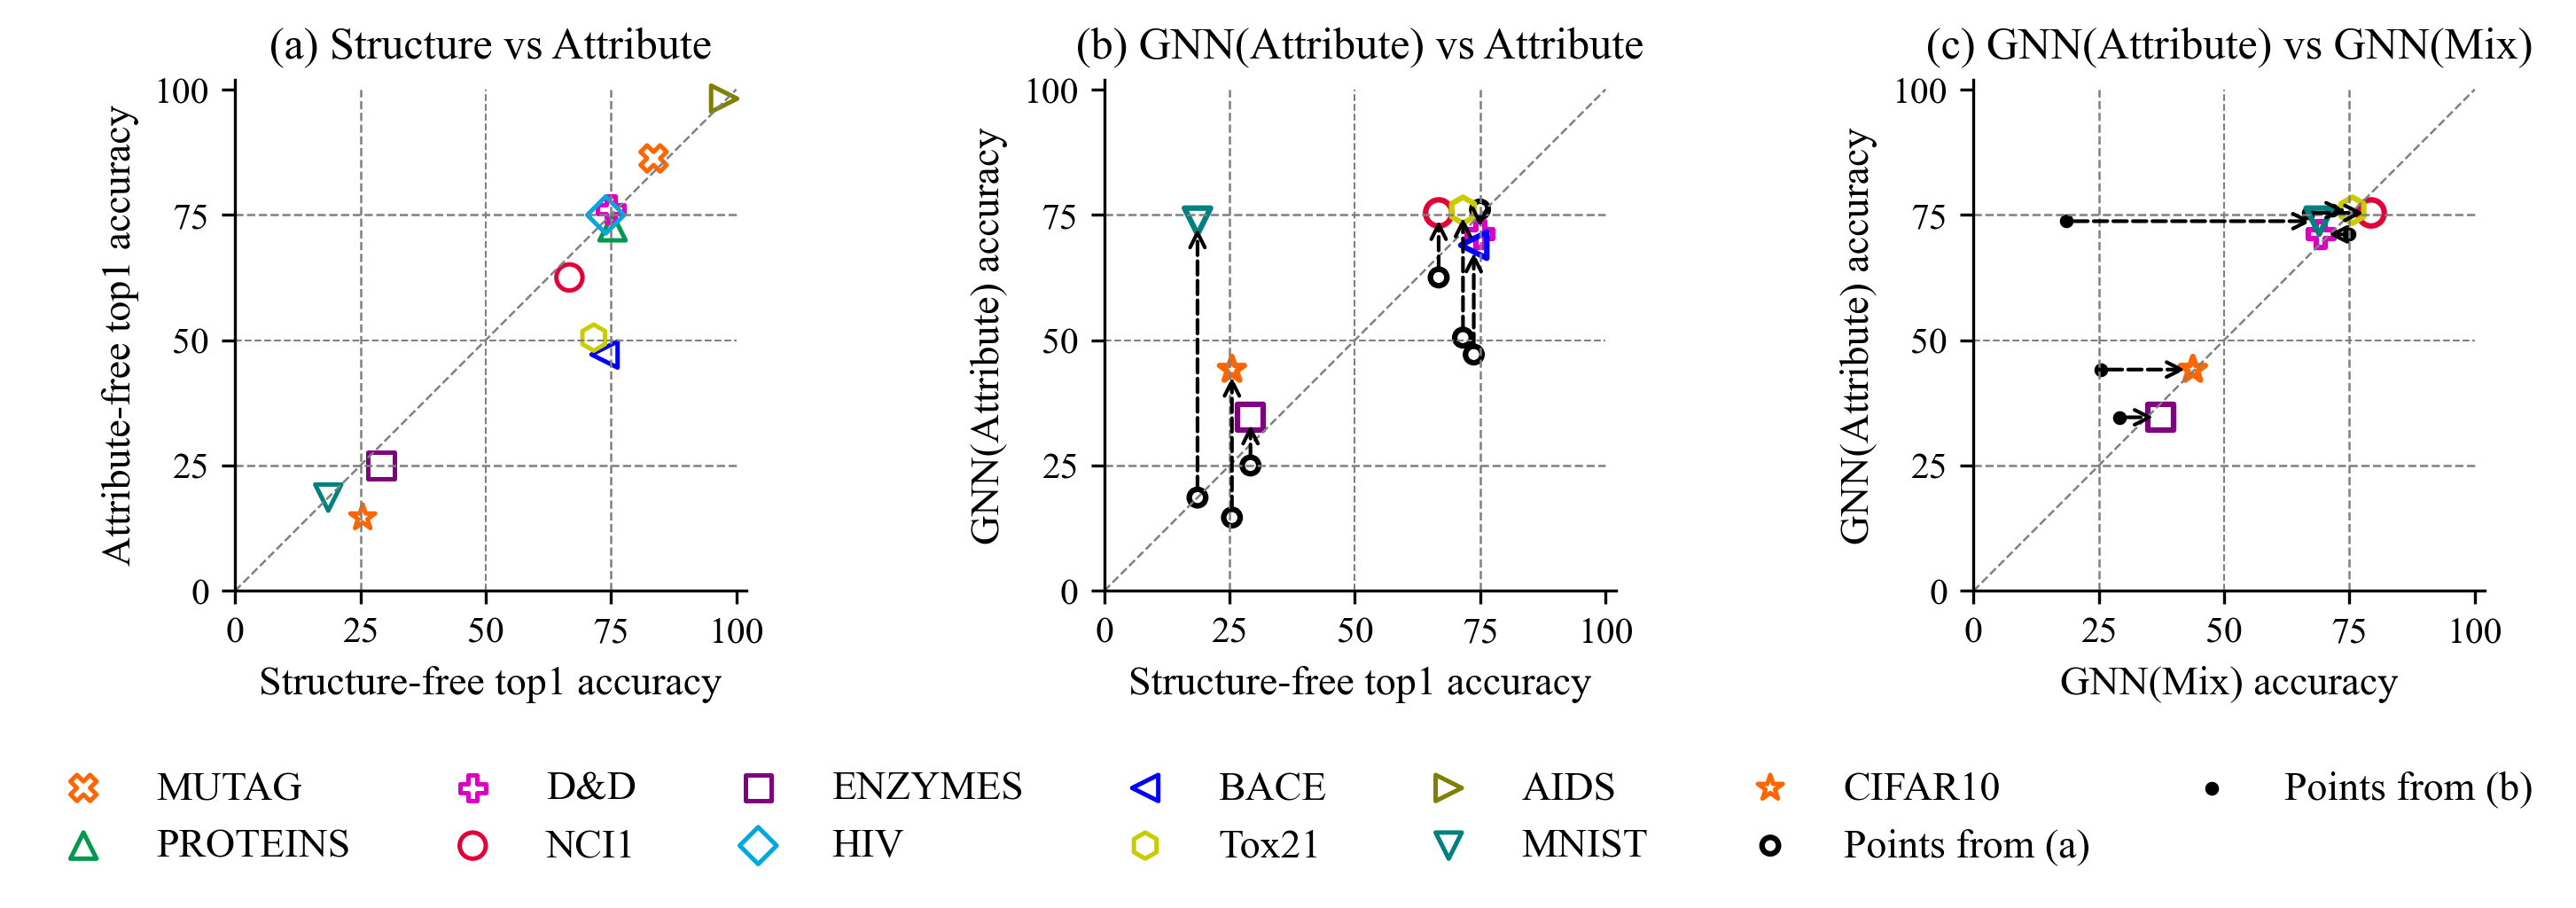

In [66]:
import matplotlib.pyplot as plt

# groups = [group1,group2,group3 ]
my_color = MyColor(cmap_name=['Dark2', 'Set1'], skip_idx=-1, pre_defined=True)
my_color.shuffle()
markers = ['o', 'v', '^', 's', '*', 'D', 'P', 'h','X','<', '>']
np.random.shuffle(markers)


# Create a new figure with three square axes
fig, axs = plt.subplots(1, 3, figsize=(9, 3),dpi=300)

for ax in axs:
    ax.set_aspect('equal', adjustable='box')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Define the colors for each point in each group
colors = [my_color.get_color() for _ in range(len(show_data))]
# data_labels = ["MUTAG", "DD"]
data_labels = show_data

x_labels = ['Attributed Acc %', 'Mixed Learning Acc %', 'Decoupled Learning Acc %']
y_labels = [ 'MLP Acc %', 'Graph Kernel Acc %', 'Degree Acc %']
# Plot the data for each group on a separate axis with different colors for each point

def plot_group(ax, x_axis_name, y_axis_name, y_labels, x_data, y_data, only_point=False,
                marker=None, color=None, line_size=None, m_size=50,
                facecolor='none', ignore_id=[], label=None, title=None):

    if not only_point:
        ax.plot([0, 100], [50, 50], linestyle='--', color='gray',linewidth=0.5)

        ax.plot([0, 100], [75, 75], linestyle='--', color='gray',linewidth=0.6)
        ax.plot([0, 100], [25, 25], linestyle='--', color='gray',linewidth=0.6)

        ax.plot([0, 100], [0, 100], linestyle='--', color='gray',linewidth=0.6)

        ax.plot([50, 50], [0, 100], linestyle='--', color='gray', linewidth=0.5)

        ax.plot([75, 75], [0, 100], linestyle='--', color='gray', linewidth=0.6)
        ax.plot([25, 25], [0, 100], linestyle='--', color='gray', linewidth=0.6)

    legend_hand = []
    for i in range(y_data.shape[0]):
        if i in ignore_id:
            continue

        if len(y_labels)>1:
            alphas = [1.0, 0.8, 0.5]
            # linestyles = ['-', '--', '--']
            # TODO: Get mean
            use_mean = False
            use_top = True
            if use_mean:
                y_mean = np.mean(y_data[i, :], axis=-1)
                legend_hand.append(ax.scatter(x=x_data[i],
                        y=y_mean, color=colors[i] if color is None else color,
                          marker=markers[i] if marker is None else marker, facecolor=facecolor,
                        linewidth=1.2 if line_size is None else line_size,
                        # linestyle=linestyles[j],
                        s=50 if m_size is None else m_size,
                        label=data_labels[i]))
            elif use_top:
                y_top = np.max(y_data[i, :], axis=-1)
                print('y_top:', y_top)
                
                legend_hand.append(ax.scatter(x=x_data[i],
                        y=y_top,  color=colors[i] if color is None else color,
                          marker=markers[i] if marker is None else marker, facecolor=facecolor,
                        linewidth=1.2 if line_size is None else line_size,
                        # linestyle=linestyles[j],
                        s=50 if m_size is None else m_size,
                        label=data_labels[i]))
            else:
                for j, y_label in enumerate(y_labels):
                    ax.scatter(x=x_data[i],
                        y=y_data[i, j], color=colors[i] if color is None else color,
                          marker=markers[i] if marker is None else marker, facecolor=facecolor,
                        linewidth=1.2 if line_size is None else line_size,
                        # linestyle=linestyles[j],
                        s=50 if m_size is None else m_size,
                        alpha=alphas[j],
                        label=y_label)
        else:
            legend_hand.append(ax.scatter(x=x_data[i],
                y=y_data[i, 0],  color=colors[i] if color is None else color,
                          marker=markers[i] if marker is None else marker, facecolor=facecolor,
                        linewidth=1.5 if line_size is None else line_size,
                s=50 if m_size is None else m_size,
                label=data_labels[i] if not only_point else label))
            
        
    # ax.legend(y_labels)
    if not only_point:
        ax.set_xlim([0, 100])
        ax.set_ylim([0, 100])
        
        ax.set_xticks([0, 25, 50, 75, 100])
        ax.set_yticks([0, 25, 50, 75, 100])

        ax.tick_params(axis='y', labelsize=10)
        ax.tick_params(axis='x', labelsize=10)
        # ax.set_title(f"Group {i+1}")
        ax.set_ylabel(y_axis_name, fontsize=11)
        ax.set_xlabel(x_axis_name, fontsize=11)

    if title is not None:
        ax.set_title(title)

    ax.set_ylim([0, 102])
    ax.set_xlim([0, 102])
    return legend_hand

# connect points:
def connect_points(cur_ax, y_labels, g1, g2, marker='.', line_size=1.5, m_size=50, facecolor='black', label=None):

    points_start = [ (x[0].item(), np.max(y).item()) for x, y in zip(g1[0], g1[1])]
    points_end = [ (x[0].item(), np.max(y).item()) for x, y in zip(g2[0], g2[1])]
    filtered_id = []
    for i in range(len(points_start)):
        dx = points_end[i][0] - points_start[i][0]
        dy = points_end[i][1] - points_start[i][1]
        if abs(dy) + abs(dx) < 4:
            filtered_id.append(i)
            continue
        arrowprops = dict(arrowstyle="->", linestyle="--", linewidth=1)
        cur_ax.annotate("", xy=points_end[i], xytext=points_start[i], arrowprops=arrowprops)

        # axs[1].plot([points_start[i][0], points_end[i][0]], [points_start[i][1], points_end[i][1]], '--')

    return plot_group(cur_ax, None, None, y_labels, g1[0], g1[1],
    color='black',
    marker=marker, 
    facecolor=facecolor,
    ignore_id=filtered_id,
    only_point=True,
    label=label,
    line_size=line_size,
    m_size=m_size,
    ), filtered_id
# ----------------------------------------------

print('group1 shape:', group1[0].shape)
plot_group(axs[0], 'Structure-free top1 accuracy', 'Attribute-free top1 accuracy', group1_y,
           group1[0], group1[1], title='(a) Structure vs Attribute')

g1lengend, filtered_id = connect_points(axs[1], group1_y, group1, group2, marker='o', facecolor='none',m_size=20, label='Points from (a)')
plot_group(axs[1], 'Structure-free top1 accuracy', group2_y[0]+' accuracy', group2_y, group2[0],
           group2[1], ignore_id=filtered_id, title='(b) GNN(Attribute) vs Attribute')

g2lengend, filtered_id = connect_points(axs[2], group2_y, group2, group3, m_size=20, facecolor='black', label='Points from (b)')
plot_group(axs[2], group3_x[0]+' accuracy', group3_y[0]+' accuracy', group3_y, group3[0], 
           group3[1], ignore_id=filtered_id, title='(c) GNN(Attribute) vs GNN(Mix)')

# g3lengend, filtered_id = connect_points(axs[3], group3_y, group3, group4, marker='x' , m_size=20, label='Points from (c)')
# plot_group(axs[3], group4_x[0], group4_y[0], group4_y, group4[0], group4[1], ignore_id=filtered_id, title='(d)')

print(len(g1lengend))

# Add some spacing between each subplot
plt.subplots_adjust(wspace=1)
print('glen: ', len(g1lengend))
print('glen: ', len(g2lengend))
# print('glen: ', len(g3lengend))
handles, labels = axs[0].get_legend_handles_labels()
# Add a figure-wise legend
bbox_to_anchors=(0.5, -0.21)

handles = handles[:len(show_data)]

# handles.extend([g1lengend[0], g2lengend[0], g3lengend[0]])
handles.extend([g1lengend[0], g2lengend[0]])

labels = labels[:len(show_data)]
labels.extend(['Points from (a)', 'Points from (b)', 'Points from (c)'])
fig.legend(handles, labels, frameon=False, ncol=7, fontsize=11, bbox_to_anchor=bbox_to_anchors, loc='lower center')
# fig.legend(handles, labels, loc='lower center', ncol=3)

# Display the plot
# plt.tight_layout(pad=1.0)


# set the spacing between subplots
plt.subplots_adjust(left=0.06,
                    bottom=0.01,
                    right=1.00,
                    top=0.99,
                    wspace=0.7,
                    hspace=0.4) 

plt.show() 


# 这里要补充一下，对于图分类任务来说，最重要的是将图的拓扑机构和属性在一个向量空间中表示，然后对这个表示进行分类，或者说，两方面的信息提取，并且映射到向量空间是进行下游任务的第一步，
# 但是，不是所有结构信息或者节点属性对图分类都有用。

# 因为kernel or GNN(degree) or MLP(mean degree) is upperbound, so incorporation of the GNN(attr) is not introducing new topological inforamtion gain, instead of its from attribute.

In [ ]:
results = {'IMDB-B':[(62.9, 2.67), (69.0, 2.98), (70.4, 2.51), (67.9, 2.8), (70.3, 2.9)],
           'IMDB-M': [(40.33, 3.79), (45.4, 2.51),(45.93, 4.19),(36.2, 2.1),(48.2, 3.2)],
           'COLLAB': [(61.66, 1.14), (59.10, 3.39), (69.92, 1.09),(0.0, 0.0),(62.7, 1.28)],
           'REDDIT-B': [(79.0, 0.0),(77.62, 2.98),(0.0,0.0),(0.0,0.0),(0.0,0.0)]
           }

show_names = ['IMDB-B', 'IMDB-M', 'COLLAB', 'REDDIT-B']

# convert to np array:

np_data = np.stack([np.array(results[name]) for name in show_names], axis=0)

print(np_data.shape)

# NOTE: plot bar diagram.#

[0.  0.4 0.8 1.2 1.6]
len of acc: 5
[3.52941176 3.92941176 4.32941176 4.72941176 5.12941176]
len of acc: 5
[7.05882353 7.45882353 7.85882353 8.25882353 8.65882353]
len of acc: 5
[10.58823529 10.98823529 11.38823529 11.78823529 12.18823529]
len of acc: 5
5


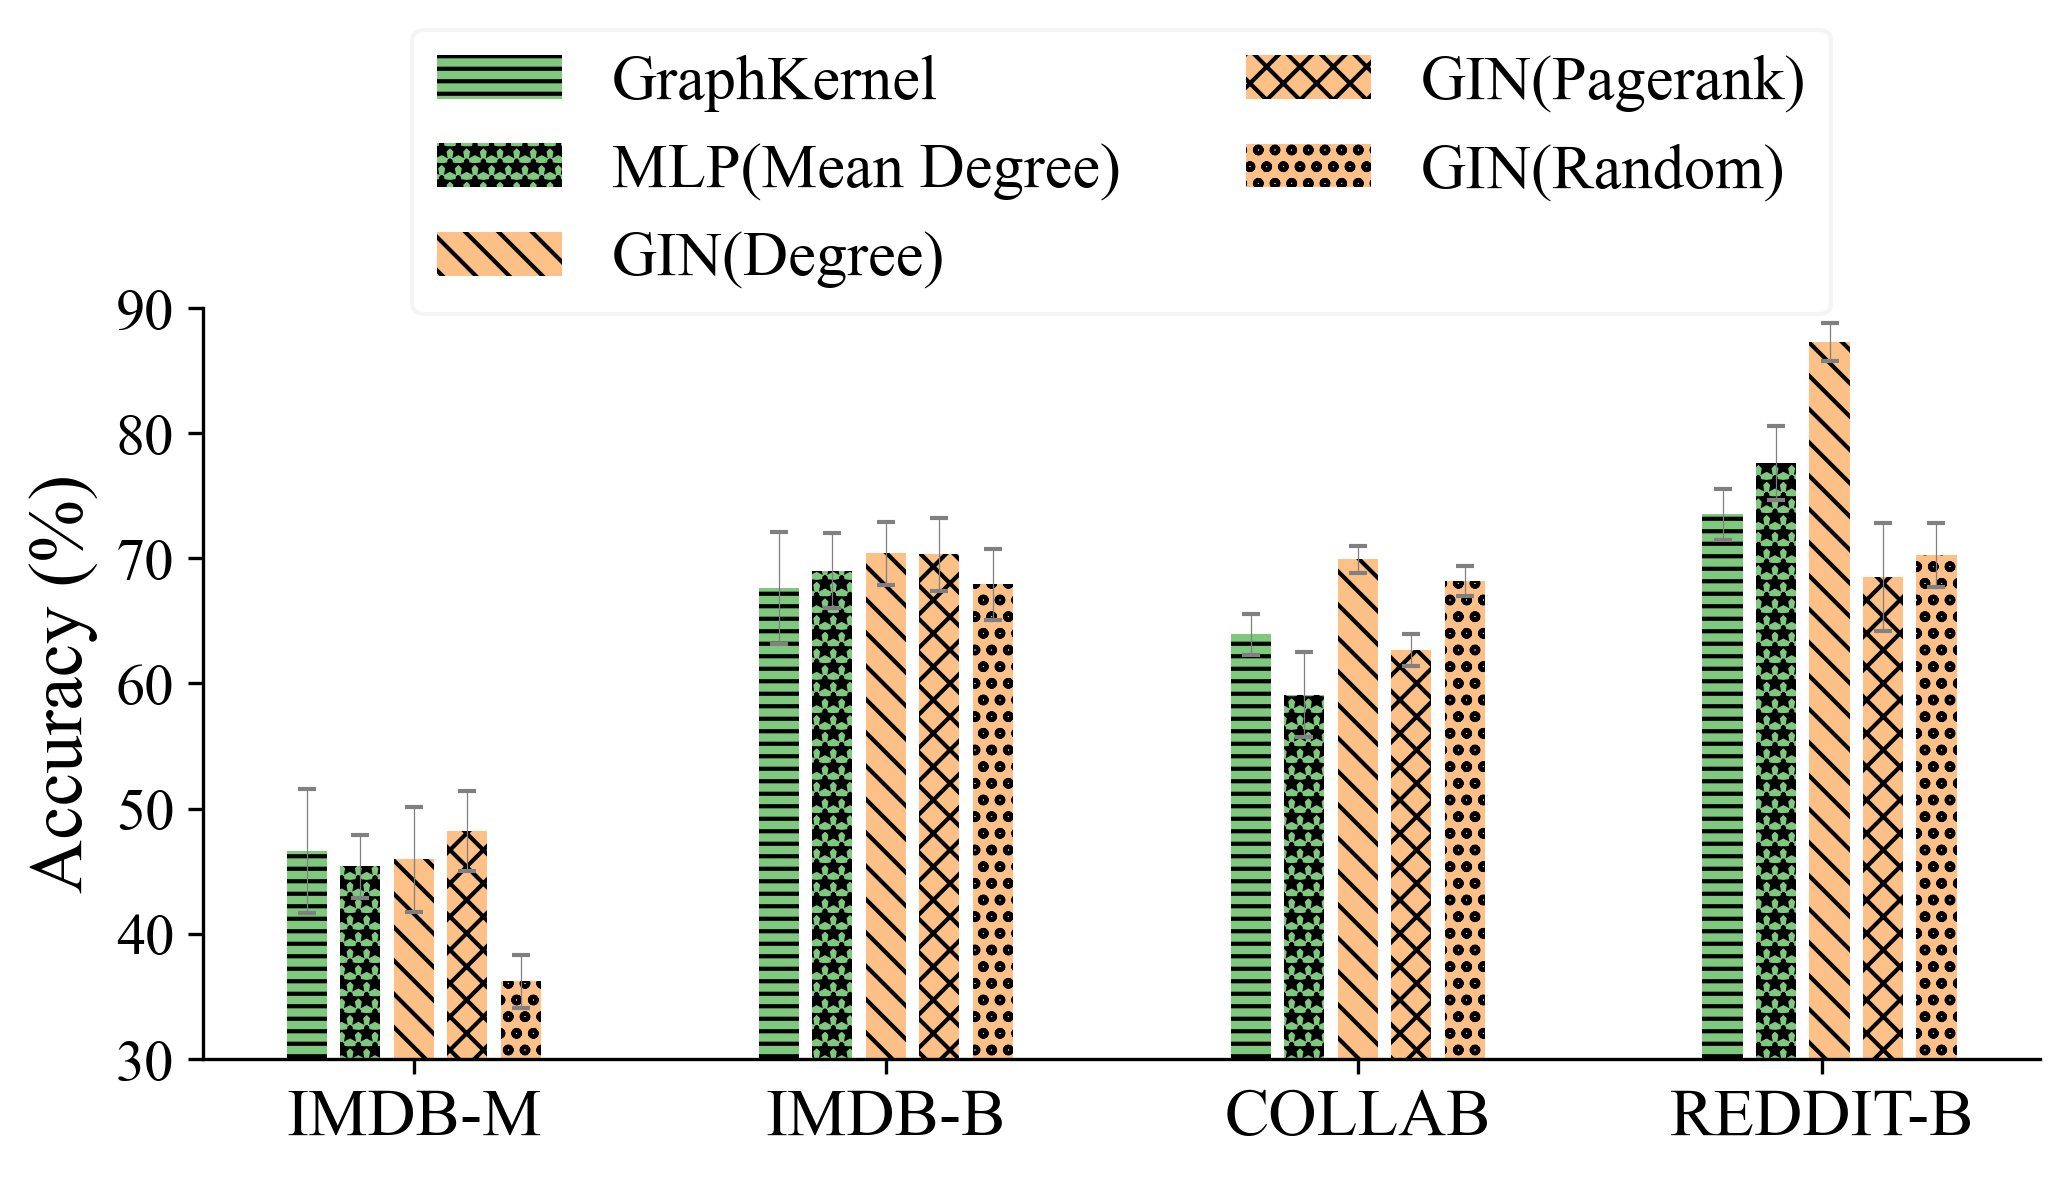

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
results = {
    'IMDB-M': [(46.6,4.95), (45.4, 2.51), (45.93, 4.19), (48.2, 3.2), (36.2, 2.1)],
    'IMDB-B': [(67.6, 4.49), (69.0, 2.98), (70.4, 2.51), (70.3, 2.9), (67.9, 2.8)],
    'COLLAB': [(63.92, 1.63), (59.10, 3.39), (69.92, 1.09), (62.7, 1.28), (68.18, 1.17)],
    'REDDIT-B': [(73.5, 2.0494), (77.62, 2.98), (87.26, 1.52), (68.51, 4.31), (70.25, 2.57)]
}

# Define the colors for each setting

my_colors = MyColor(cmap_name="Accent")

# my_colors.shuffle()

# colors = ['blue', 'orange', 'green', 'red', 'purple']

# colors = [my_colors.get_color() for _ in range(5)]

# colors[0] = colors[1]
# colors[1] = 'red'

# Create the plot
fig, ax = plt.subplots(figsize=(7, 4), dpi=300)

# Iterate over each dataset

std_bar_ax = []

"""
'/'       - diagonal hatching
'\\'      - backslash hatching
'|'       - vertical hatching
'-'       - horizontal hatching
'+'       - cross hatching
'x'       - diagonal cross hatching
'.'       - small dot hatching
'o'       - large dot hatching
'O'       - white circle hatching
'*'       - star hatching
'-'       - horizontal dash hatching
'+'       - diagonal cross hatching (thick lines)
'x'       - diagonal cross hatching (thin lines)
'\\'      - backslash hatching (thick lines)
'/'       - diagonal hatching (thick lines)
'.'       - dots (thin lines)
'o'       - dots (thick lines)
'-'       - horizontal dash hatching (thick lines)
'+'       - cross hatching (thick lines)
'x'       - diagonal cross hatching (thick lines)
'\\'      - backslash hatching (thin lines)
'/'       - diagonal hatching (thin lines)
'|'       - vertical hatching (thin lines)
"""
hatches = ['/', '\\', '|', '-', '+', 'x', '.', 'o', 'O', '*', '-', 
           '+', 'x', '\\', '/', '.', 'o', '-', '+', 'x', '\\', '/', '|']

xticks_labels = ['IMDB-M', 'IMDB-B', 'COLLAB', 'REDDIT-B']
legend_labels = ['GraphKernel', 'MLP(Mean Degree)', 'GIN(Degree)', 'GIN(Pagerank)', 'GIN(Random)', 'Standard deviation']
    'IMDB-M': [(46.6,4.95), (45.4, 2.51), (45.93, 4.19), (48.2, 3.2), (36.2, 2.1)],
    'IMDB-B': [(67.6, 4.49), (69.0, 2.98), (70.4, 2.51), (70.3, 2.9), (67.9, 2.8)],
    'COLLAB': [(63.92, 1.63), (59.10, 3.39), (69.92, 1.09), (62.7, 1.28), (68.18, 1.17)],
    'REDDIT-B': [(73.5, 2.0494), (77.62, 2.98), (87.26, 1.52), (68.51, 4.31), (70.25, 2.57)]


colors = [my_colors.get_color() for _ in range(len(legend_labels))]
kernel_mlp_colors = [colors[0] for _ in range(2)]
gnn_colors = [colors[2] for _ in range(3)]

colors = kernel_mlp_colors + gnn_colors

hatches = ['-'*4, '*'*3, '\\'*3, 'x'*3, 'o'*3]

# NOTE: first kernel and MLP have same hatch, 
# Distinguish method by hatch, color is for kernel or GNN method?

#

handlers = []
for idx, (dataset, values) in enumerate(results.items()):
    acc = [x[0] for x in values]  # Accuracy values
    std = [x[1] for x in values]  # Standard deviation values
    x_labels = [f'Setting {i+1}' for i in range(len(values))]  # Label for each bar

    # Calculate the x position for each bar
    x_pos = np.arange(len(values))/2.5 + idx * (len(values) + 1) / 1.7
    print(x_pos)
    # Add the accuracy bars to the plot
    print('len of acc:', len(acc))
    handlers.append(ax.bar(x_pos, acc, align='center', alpha=1, color=colors, width=0.3, hatch=hatches))

    # Add the standard deviation bars to the plot
    std_bar_ax.append(ax.errorbar(x_pos, acc, yerr=std, fmt='none', ecolor='gray', elinewidth=0.3, capsize=2.2, label='Standard deviation'))

# Set the labels and title for the plot
ax.set_ylabel('Accuracy (%)',fontsize=18)
ax.set_ylim([0, 100])
# ax.set_xlabel('Datasets', fontsize=11)

# Adjust the x-ticks
xticks_pos = [0.8, 4.33, 7.86, 11.33]
xticks_pos = [i for i in xticks_pos]


ax.set_xticks(xticks_pos, fontsize=20)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xticklabels(xticks_labels,  fontsize=16)
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim(30, 90)

# Add the legend below the entire figure
legend = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
legend.extend([std_bar_ax[0]])
bbox_to_anchors=(1, 1)

handles, labels = ax.get_legend_handles_labels()

handles = handlers[0]

print(len(handles))
ax.legend(handles, legend_labels,
           bbox_to_anchor=(0., 0.95, 1, .102), loc='lower center', 
           ncol=2, fontsize=15, fancybox=True, shadow=False, framealpha=0.2)
# loc='upper left'



# plt.title('Performance Comparison of Different Datasets')
# Adjust the layout to make space for the legend
plt.subplots_adjust(bottom=0.1)

# Display the plot
# plt.tight_layout()
# plt.show()

fig.tight_layout()
fig.savefig('test.png')


# plt.savefig('kkkk', bbox_inches='tight')
# 



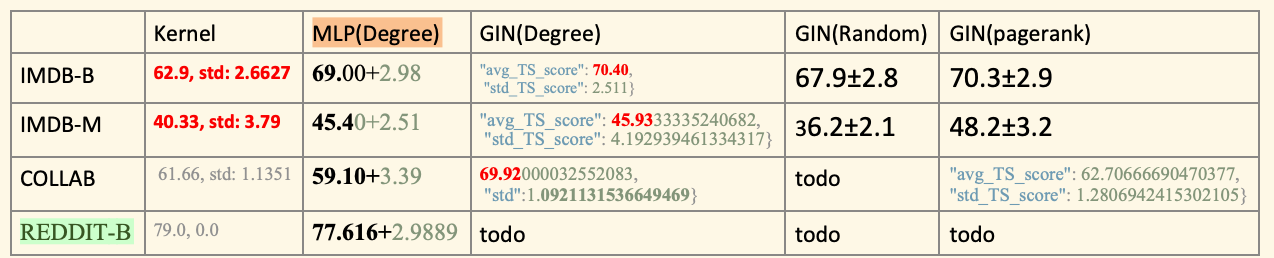

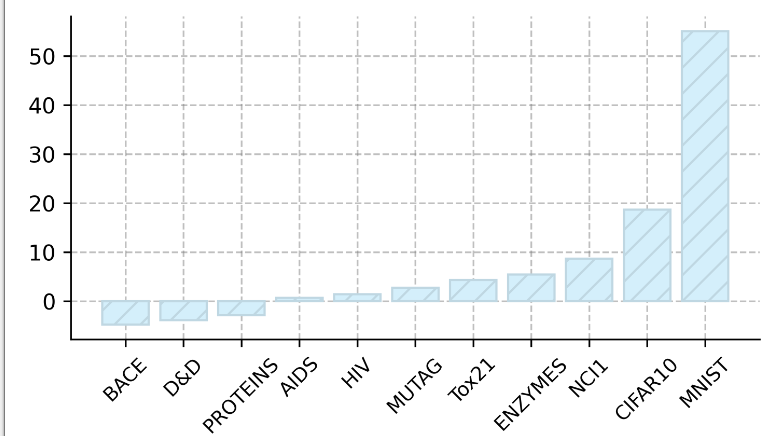

# load whole regression datasets:

In [25]:

# save datasets
import pickle as pk

def save_datasets(datasets, file_name):
    with open(file_name, 'wb') as f:
        pk.dump(datasets, f)

def load_datasets(file_name):
    with open(file_name, 'rb') as f:
        datasets = pk.load(f)
    return datasets


"""
- small: MUTAG, NCI1, DD, CIFAR10, MNIST, imdb_b, ogbg-molhiv, ogbg-molbace, ogbg-moltox21
- middle: ogbg-ppa, (ogbg-molpcba, ogbg-code2, to be done)
10-fold: MUTAG, NCI1, DD, CIFAR10, MNIST, imdb_b, SynCC
one split: ogbg-molhiv, ogbg-molbace, ogbg-moltox21, ogbg-ppa

use 10-fold to trian, use one split to test

"""
"""
Medium	ogbg-molpcba	>=1.2.2	437,929	26.0	28.1	128	Scaffold	Binary classification	AP
Medium	ogbg-ppa	>=1.1.1	158,100	243.4	2,266.1	1	Species	Multi-class classification	Accuracy
Medium	ogbg-code2
"""

# small scale: < 10k
""""
whole_aids_datasets.pkl
whole_cifar10_datasets.pkl
whole_dd_datasets.pkl
whole_enzymes_datasets.pkl
whole_imdb_b_datasets.pkl
whole_imdb_m_datasets.pkl
whole_minst_datasets.pkl
whole_mutag_datasets.pkl
whole_nci1_datasets.pkl
whole_ogbg_molbace_datasets.pkl
whole_ogbg_molhiv_datasets.pkl
whole_ogbg_moltox21_datasets.pkl
whole_proteins_datasets.pkl
"""

def label_replace(name:str):
    name = name.lower()
    if 'hiv' in name:
        return 'HIV'
    elif 'bace' in name:
        return 'BACE'
    elif 'tox21' in name:
        return 'Tox21'
    elif 'ppa' in name:
        return 'PPA'
    elif 'bace' in name:
        return 'BACE'
    return name.upper()


def load_all_datasets(pre_fix='whole_'):
    
    train_datasets_names = ['mutag', 'nci1', 'dd', 'imdb_b', 'imdb_m', 'mnist',
                            'cifar10', 'aids', 'enzymes', 'proteins']
    test_datasets_names = ['ogbg_molhiv', 'ogbg_moltox21', 'ogbg_molbace']

    train_datasets = []
    for k in train_datasets_names:
        train_datasets.append((load_datasets(f'{pre_fix}{k}_datasets.pkl'), k))

    test_datasets = []
        
    for k in test_datasets_names:
        test_datasets.append((load_datasets(f'{pre_fix}{k}_datasets.pkl'),k))
       
    all_datasets = train_datasets + test_datasets
    show_data = train_datasets_names + test_datasets_names 
    return all_datasets, show_data

import importlib
import generate_regression_10fold as grd

importlib.reload(grd)

as_whole = True
    
all_e = []
# all_e.append((grd.generate_mutag(as_whole, return_E=True, dim_y=2), 'mutag'))
# all_e.append((grd.generate_NCI1(as_whole, return_E=True, dim_y=2), 'nci1'))
# all_e.append((grd.generate_AIDS(as_whole, return_E=True, dim_y=2), 'aids'))
# all_e.append((grd.generate_DD(as_whole, return_E=True, dim_y=2), 'dd'))
# all_e.append((grd.generate_ENZYMES(as_whole, return_E=True, dim_y=6), 'enzymes'))
# all_e.append((grd.generate_PROTEINS(as_whole, return_E=True, dim_y=2), 'proteins'))
all_e.append((grd.generate_bace(as_whole, return_E=True, dim_y=2), 'bace'))
all_e.append((grd.generate_HIV(as_whole, return_E=True, dim_y=2), 'hiv'))
all_e.append((grd.generate_tox21(as_whole, return_E=True, dim_y=12), 'tox21'))
all_e.append((grd.generate_ppa(as_whole, return_E=True, dim_y=37), 'ppa'))
# all_e.append((grd.generate_IMDB_M(as_whole, return_E=True, dim_y=3), 'imdb_m'))
# all_e.append((grd.generate_IMDB_B(as_whole, return_E=True, dim_y=2), 'imdb_b'))
# all_e.append((grd.generate_REDDITB(as_whole, return_E=True, dim_y=2), 'reddit'))
# all_e.append((grd.generate_COLLAB(as_whole, return_E=True, dim_y=3), 'collab'))
# all_e.append((grd.generate_CIFAR10(as_whole, return_E=True, dim_y=10), 'cifar10'))
# all_e.append((grd.generate_MNIST(as_whole, return_E=True, dim_y=10), 'mnist'))


dict_keys(['REDDIT-BINARY', 'REDDIT-MULTI-5K', 'COLLAB', 'IMDB-BINARY', 'IMDB-MULTI', 'NCI1', 'AIDS', 'ENZYMES', 'PROTEINS', 'DD', 'MUTAG', 'CSL', 'CIFAR10', 'MNIST', 'PPI', 'hiv', 'bace', 'bbpb', 'ogbg_molhiv', 'ogbg_ppa', 'PTC', 'QM9', 'ogbg_moltox21', 'ogbg-molbbbp', 'ogbg-molbace', 'syn_cc'])
MLP_test_acc_attr 69.6165913975085
GNN_test_acc_attr 79.86348338840148
MLP_test_acc_struct 54.32903469844024
GNN_test_acc_struct 79.54949491661961
MLP_test_acc_attr 96.4913565303856
GNN_test_acc_attr 96.92254506415256
MLP_test_acc_struct 96.52782862516952
GNN_test_acc_struct 96.69236024445924
MLP_test_acc_attr 91.04825939775326
GNN_test_acc_attr 91.30686618519478
MLP_test_acc_struct 90.42670726127365
GNN_test_acc_struct 90.5338460182657
MLP_test_acc_attr 20.116858240763346
GNN_test_acc_attr 24.04693487174666
MLP_test_acc_struct 9.282567050100743
GNN_test_acc_struct 64.18582377115887


In [22]:
def plot_whole_dataset_E(es=None):
    if es is None:
        all_datasets, show_data = load_all_datasets()
        es = []
        for i, d in enumerate(all_datasets):
            es.append((d[0][0][1], show_data[i]))

    e_res = sorted(es, key=lambda x:x[0])

    labels = [label_replace(e[1]) for e in e_res]

    fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
    for e in e_res:
        bars = ax.bar(e[1], e[0], label=e[1], alpha=0.9, color='lightblue', hatch='\\', edgecolor='black', linewidth=0.5)

    # hide the top and right boundary:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # set xticks label fontsize:
    ax.set_xticks(range(len(labels)))

    # ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=18)
    ax.set_xticklabels(labels, rotation=60, ha='center', fontsize=17)
    ax.set_axisbelow(True)
    ax.grid(linestyle='dashed',zorder=0)
    # ax.set_ylabel('Structural Performance Gap', fontsize=15)
    # ax.set_title(title)
    ax.yaxis.set_tick_params(labelsize=18)


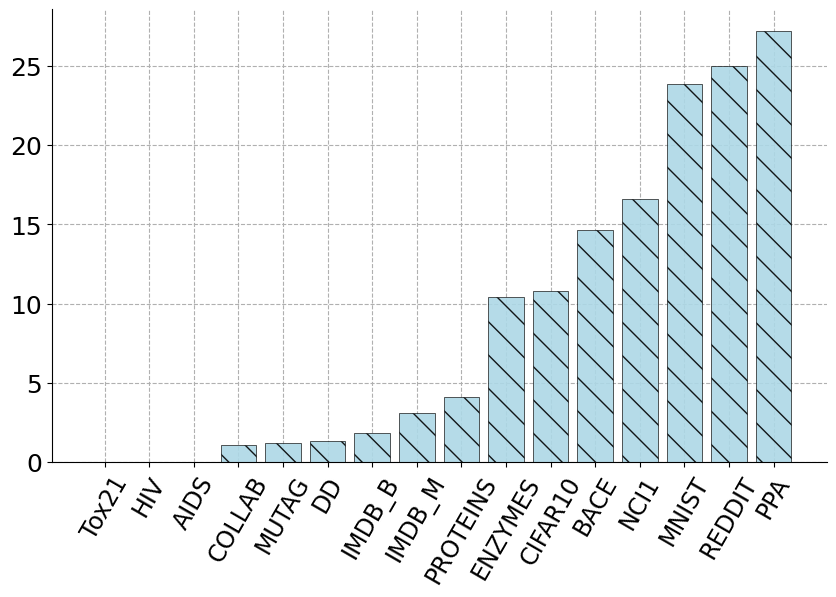

In [23]:
# class factor = 1
plot_whole_dataset_E(all_e)

In [ ]:
plot_whole_dataset_E(all_e)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


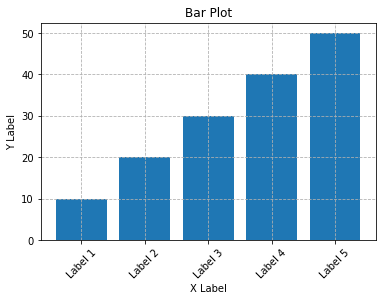

In [37]:
import matplotlib.pyplot as plt

# Create some example data
labels = ['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5']
values = [10, 20, 30, 40, 50]

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, values)

# Rotate x-axis labels by 45 degrees and align to center
ax.set_xticklabels(labels, rotation=45, ha='center')

# Set plot properties
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Bar Plot')

# Add dashed grid below the bars
ax.grid(linestyle='dashed', zorder=0)

# Set zorder for bars to be on top of the grid
for bar in bars:
    bar.set_zorder(1)

plt.show()


In [ ]:
# NOTE: old version.

# NOTE: plot first group:
for i, ax in enumerate(axs):
    ax.plot([0, 100], [50, 50], linestyle='--', color='gray',linewidth=0.5)
    ax.plot([0, 100], [75, 75], linestyle='--', color='gray',linewidth=0.6)
    ax.plot([0, 100], [25, 25], linestyle='--', color='gray',linewidth=0.6)

    ax.plot([0, 100], [0, 100], linestyle='--', color='gray',linewidth=0.6)

    ax.plot([50, 50], [0, 100], linestyle='--', color='gray', linewidth=0.5)
    ax.plot([75, 75], [0, 100], linestyle='--', color='gray', linewidth=0.6)
    ax.plot([25, 25], [0, 100], linestyle='--', color='gray', linewidth=0.6)
    for j in range(groups[i][0].shape[0]):
        if i == 0 or i == 2:
            c_shape = []
            for y_each in range(groups[i][1].shape[1]):
                ax.scatter(x=groups[i][0][j, 0],
                    y=groups[i][1][j, y_each], color=colors[j], marker=markers[j], facecolor='none',
                    linewidth=1.5,
                    label=data_labels[j]+)
        else:
            ax.scatter(x=groups[i][0][j, 0],
                    y=groups[i][1][j, 0], color=colors[j], marker=markers[j], facecolor='none',
                    linewidth=1.5,
                    label=data_labels[j])
        
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_yticks([0, 25, 50, 75, 100])

    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelsize=10)
    # ax.set_title(f"Group {i+1}")
    ax.set_ylabel(y_labels[i], fontsize=11)
    ax.set_xlabel(x_labels[i], fontsize=11)
    

# Add some spacing between each subplot
plt.subplots_adjust(wspace=0.5)

handles, labels = ax.get_legend_handles_labels()
# Add a figure-wise legend
bbox_to_anchors=(0.5, -0.11)
fig.legend(handles, labels, frameon=False, ncol=4, fontsize=11, bbox_to_anchor=bbox_to_anchors, loc='lower center')
# fig.legend(handles, labels, loc='lower center', ncol=3)

# Display the plot
plt.show()


In [ ]:
import numpy as np

# Define the adjacency matrix
P = np.array([[0, 1, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [0, 0, 0, 1, 1],
              [0, 0, 1, 0, 1],
              [0, 0, 1, 1, 0]])

# Switch the first and third rows
P[[0, 2], :] = P[[2, 0], :]

# Switch the first and third columns
P[:, [0, 2]] = P[:, [2, 0]]

# Print the modified permutation matrix
print(P)